# Összefüggésvizsgálat

Az összefüggésvizsgálat módszereinek átteintéséhez olvassuk be az *iris* adathalmazt és a szükséges csomagokat.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('iris.txt', 
                   sep=';',
                   decimal=',',
                   names=['slength', 'swidth', 'plength', 'pwidth', 'iclass'])

## Korreláció

A változók közti korreláció könnyen kiszámítható a *pandas* csomag **corr** függvényével. A korreláció típusát a *method* paraméterében definiálhatjuk, amely lehet:   
- 'pearson'
- 'spearman'
- 'kendall'

### Pearson korreláció

Két attribútum értékei közti korreláció mértékét a következőképpen számíttathatjuk ki: 

In [3]:
iris['slength'].corr(iris['swidth'])

-0.10936924995064937

A DataFrame összes folytonos értékű attribútuma közt számított korrelációs együtthatókat a korrelációs mátrixban jeleníthetjük meg:

In [4]:
iris.corr(method='pearson')

,slength,swidth,plength,pwidth
slength,1.000000,-0.109369,0.871754,0.817954
swidth,-0.109369,1.000000,-0.420516,-0.356544
plength,0.871754,-0.420516,1.000000,0.962757
pwidth,0.817954,-0.356544,0.962757,1.000000


A korrelációs mátrix könnyebben áttekinthető, ha az értékeket hőtérképen is vizualizáljuk:

In [5]:
iris.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,slength,swidth,plength,pwidth
slength,1.0,-0.11,0.87,0.82
swidth,-0.11,1.0,-0.42,-0.36
plength,0.87,-0.42,1.0,0.96
pwidth,0.82,-0.36,0.96,1.0


Az összefüggések áttekintésekor nagyobb adathalmaz esetén gyakorta elegendő a hőtérképet megjeleníteni. Ennek első lépése maga a hőtérkép kirajzolása. A hőtérképeken használatos colormap-ek [itt](https://matplotlib.org/examples/color/colormaps_reference.html) tekinthetők meg. 

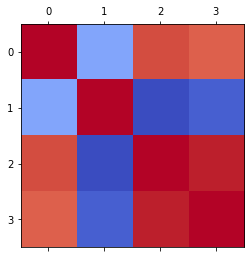

In [6]:
plt.matshow(iris.corr(method='pearson'), cmap='coolwarm')
plt.show()

A közérthetőséget nagy mértékben befolyásolja, hogy pontosan tudjuk-e értelmezni az egyes színek jelentését. Ezért mindenképpen ajánlatos a *colorbar* elhelyezése a grafikonon.

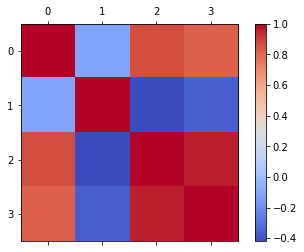

In [7]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
cax = ax.matshow(iris.corr(method='pearson'), cmap='coolwarm')
ax.xticklabels=iris[1:4]
fig1.colorbar(cax)
plt.show()

Hasonló eredményt kapunk a **seaborn** csomag **heatmap** metódusával is, kissé rövidebb fromában:

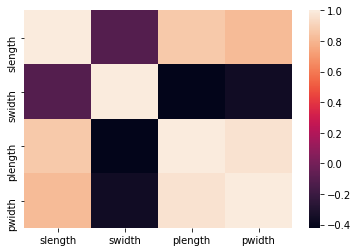

In [8]:
import seaborn as sns
corr_result = iris.corr(method='pearson')
sns.heatmap(corr_result, 
            xticklabels=corr_result.columns.values,
            yticklabels=corr_result.columns.values)
plt.show()

### Spearman rangkorreláció

A Spearman-féle rangkorreláció könnyen számítható szintén a **df.corr** függvény segítségével:

In [9]:
df1 = pd.DataFrame()
df1['Jövedelmezoseg'] = [8, 10, 9, 5, 2, 7, 3, 4, 1, 6]
df1['Likviditas'] = [5, 8, 10, 4, 3, 7, 1, 6, 2, 9]
df1

,Jövedelmezoseg,Likviditas
0,8,5
1,10,8
2,9,10
3,5,4
4,2,3
5,7,7
6,3,1
7,4,6
8,1,2
9,6,9


In [10]:
df1.corr(method='spearman')

,Jövedelmezoseg,Likviditas
Jövedelmezoseg,1.000000,0.793939
Likviditas,0.793939,1.000000


### Kendall rangkorreláció

Hasonló a helyzet a Kendall rangkorreláció számításával is:

In [11]:
df1.corr(method='kendall')

,Jövedelmezoseg,Likviditas
Jövedelmezoseg,1.0,0.6
Likviditas,0.6,1.0


## Khí-négyzet próba

A khí-négyzet próba elvégzéséhez tekintsük a bukósisak színe és a balesetek összefüggését vizsgáló példát:

|           | Fekete |  Fehér | Sárga/Narancs |
| ----------|:------:| :-----:| :------------:|
| Kontroll  | 491    | 377    | 31            |
| Balestes  | 213    | 112    | 8             |

A khí négyzet próba a **scipy.stats** csomag **chi2_contingency** függvényével végezhető el:

In [13]:
import scipy.stats as stats

obs = np.array([[491, 377, 31], [213, 112, 8]])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2 = ' + str(chi2))
print('p = ' + str(p))
print('degree of freedom = ' + str(dof))
print('expected values = ')
print(expected)

chi2 = 8.77471206682259
p = 0.012433559716419771
degree of freedom = 2
expected values = 
[[513.71428571 356.82711039  28.4586039 ]
 [190.28571429 132.17288961  10.5413961 ]]


## Regresszió

A regressziószámításról [itt](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb) érhető el egy remek Notebook, amely tökéletesen foglalja össze a szükséges ismereteket.